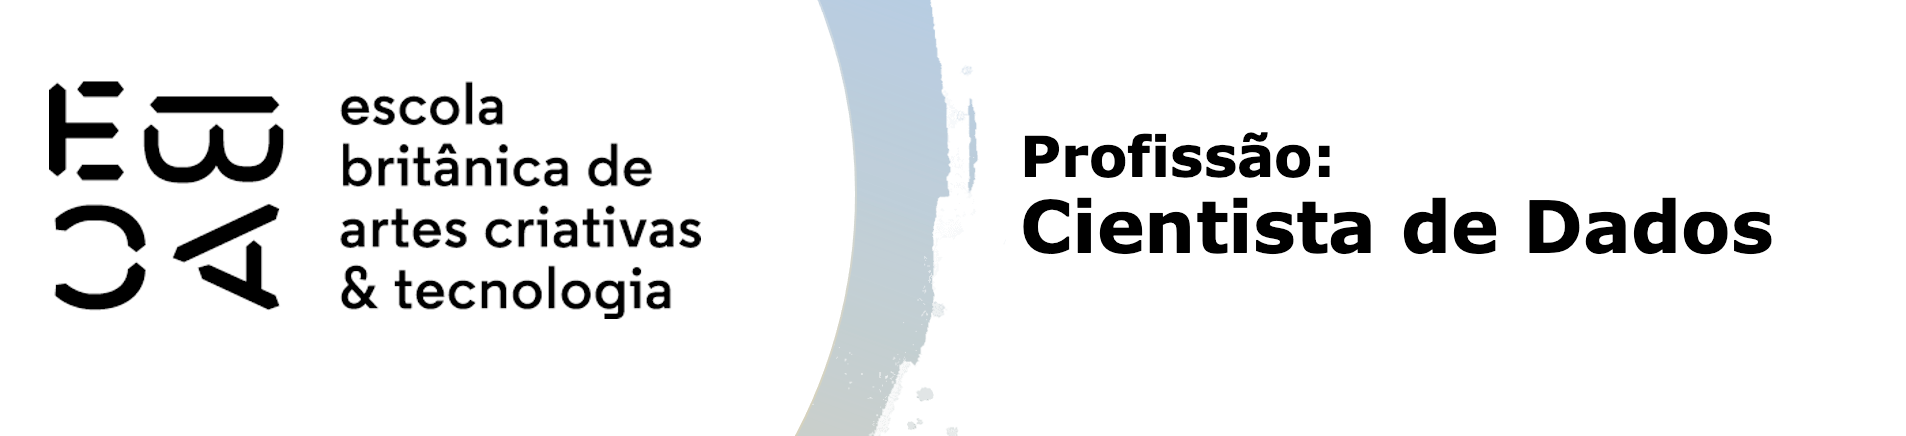

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [7]:
df = pd.read_csv('online_shoppers_intention.csv')

In [8]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [9]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [10]:
variaveis_interesse = [
    'Administrative', 
    'Administrative_Duration', 
    'Informational', 
    'Informational_Duration', 
    'ProductRelated', 
    'ProductRelated_Duration'
]

E:\Users\Matheus Cerqueira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


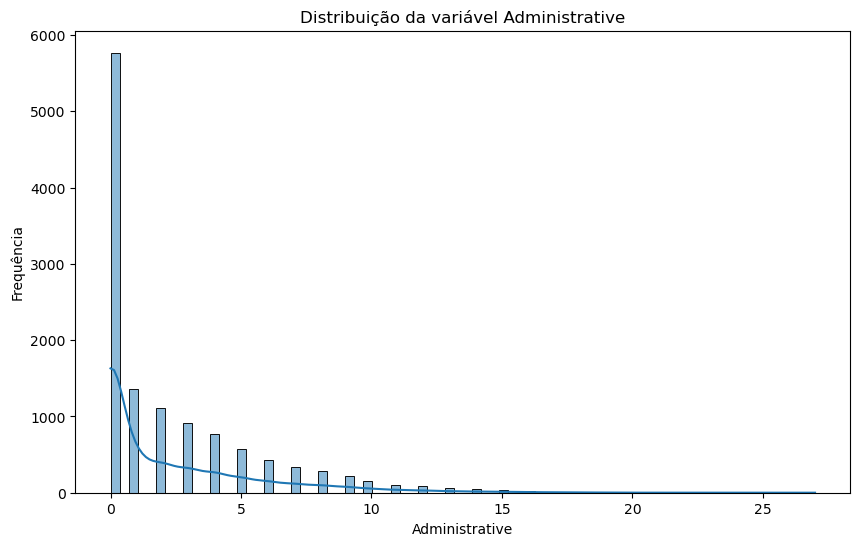

E:\Users\Matheus Cerqueira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


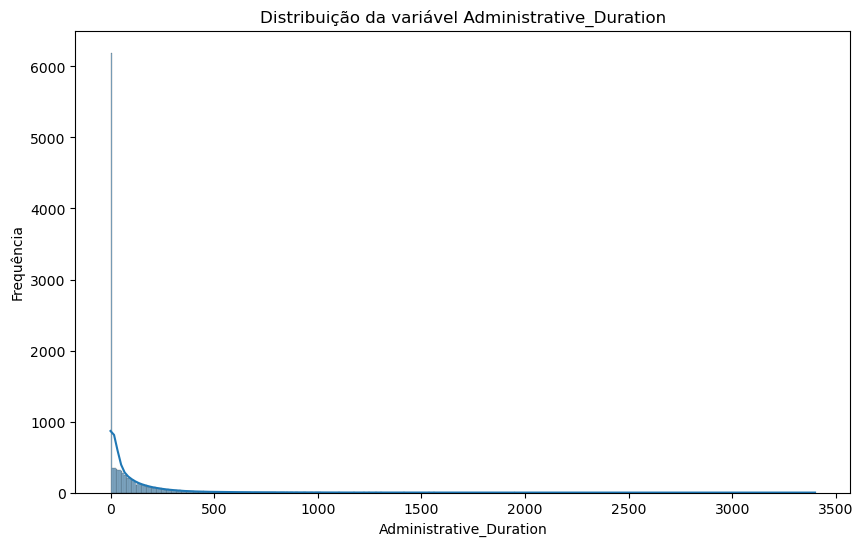

E:\Users\Matheus Cerqueira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


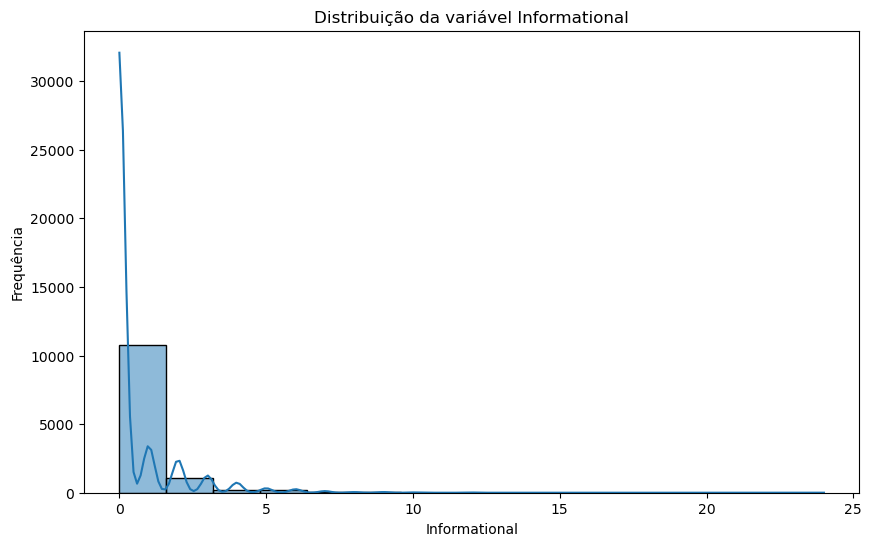

E:\Users\Matheus Cerqueira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


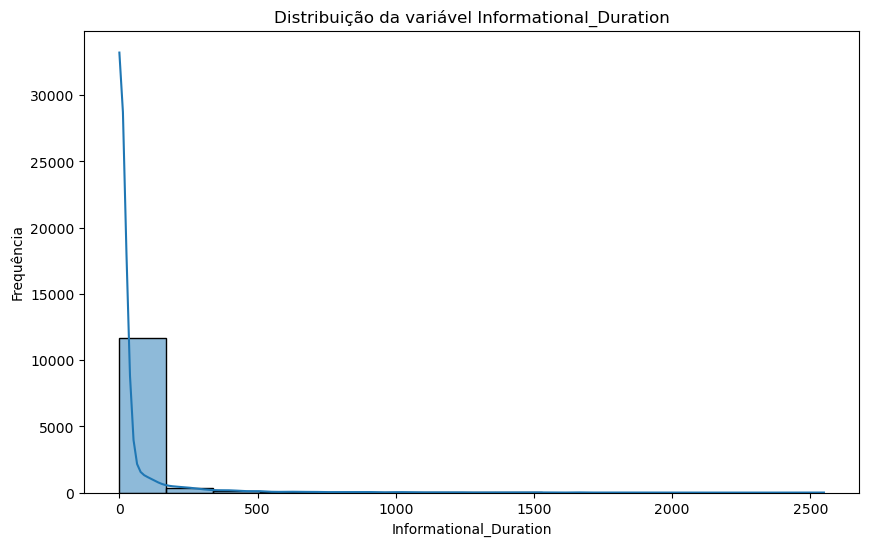

E:\Users\Matheus Cerqueira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


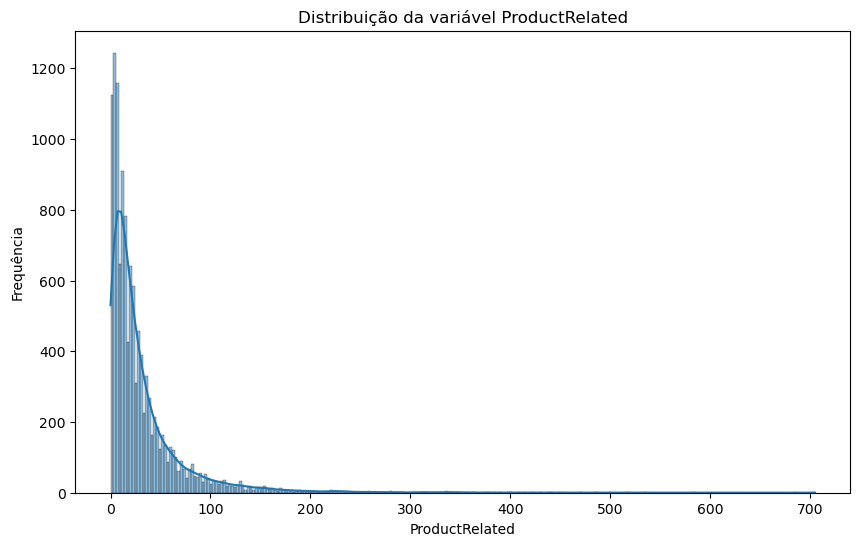

E:\Users\Matheus Cerqueira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


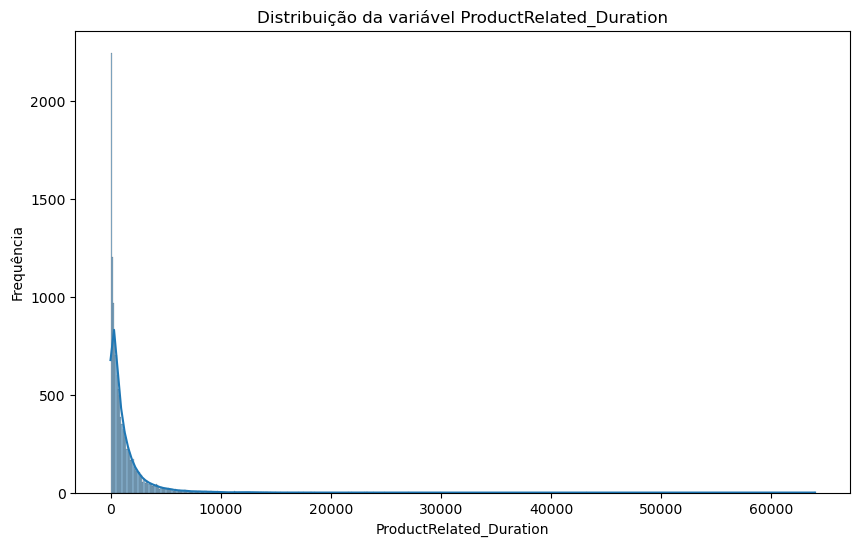

In [11]:
# Verificando a distribuição de cada variável
for var in variaveis_interesse:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribuição da variável {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.show()

In [12]:
# Verificando a presença de valores missing nas variáveis de interesse
valores_missing = df[variaveis_interesse].isnull().sum()
valores_missing

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
dtype: int64

In [13]:
estatisticas_descritivas = df[variaveis_interesse].describe()
estatisticas_descritivas

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230


E:\Users\Matheus Cerqueira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


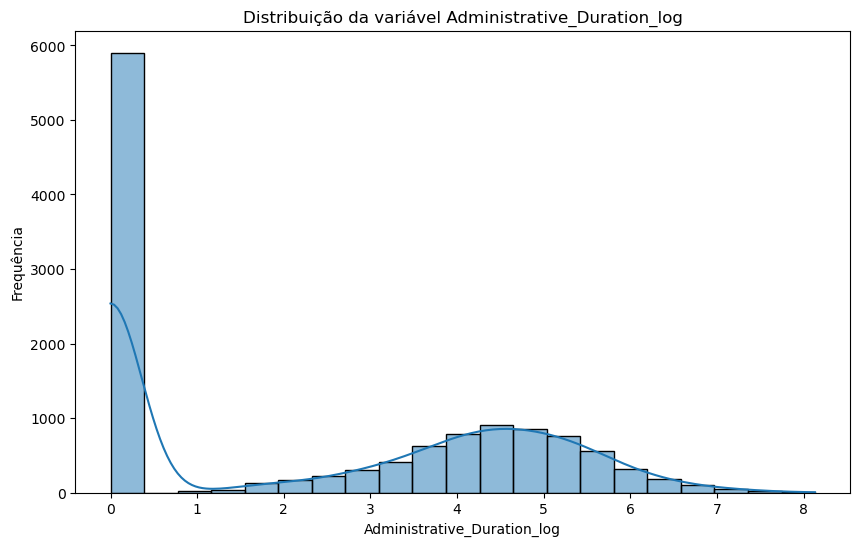

E:\Users\Matheus Cerqueira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


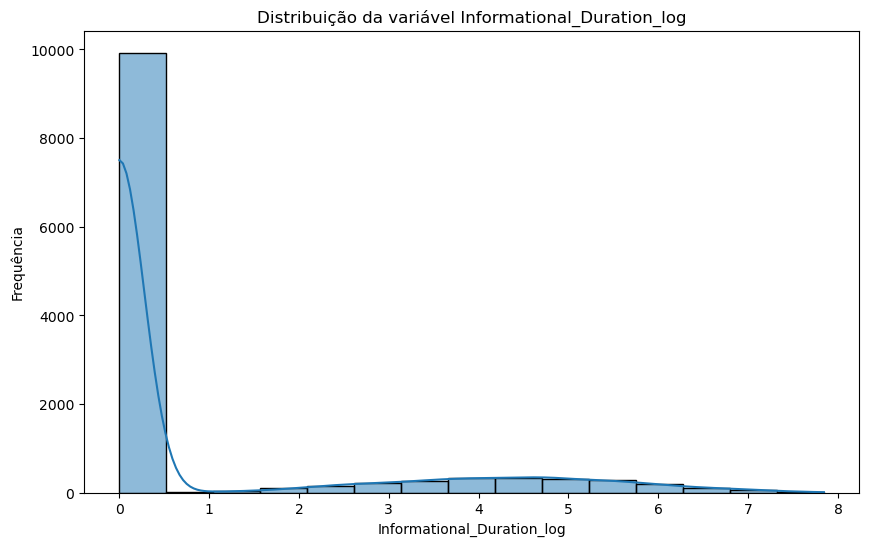

E:\Users\Matheus Cerqueira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


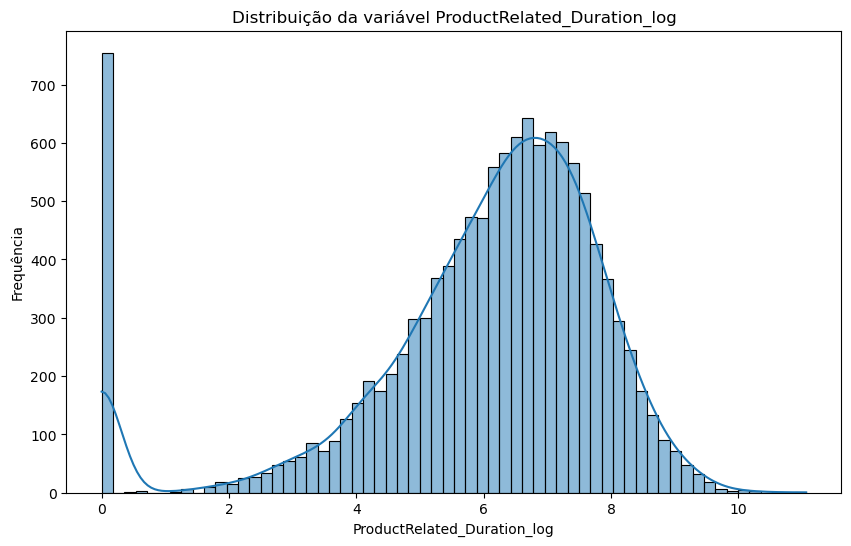

In [14]:
# Aplicando transformação logarítmica nas variáveis de duração
df['Administrative_Duration_log'] = np.log1p(df['Administrative_Duration'])
df['Informational_Duration_log'] = np.log1p(df['Informational_Duration'])
df['ProductRelated_Duration_log'] = np.log1p(df['ProductRelated_Duration'])

# Verificando a distribuição após a transformação
for var in ['Administrative_Duration_log', 'Informational_Duration_log', 'ProductRelated_Duration_log']:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribuição da variável {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.show()

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

In [15]:
# Preparando os dados para clustering
dados_clustering = df[['Administrative', 'Administrative_Duration_log', 'Informational', 'Informational_Duration_log', 'ProductRelated', 'ProductRelated_Duration_log']]

# Testando diferentes números de clusters
range_clusters = range(2, 11)
silhouette_scores = []

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(dados_clustering)
    silhouette_avg = silhouette_score(dados_clustering, clusters)
    silhouette_scores.append(silhouette_avg)

E:\Users\Matheus Cerqueira\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Users\Matheus Cerqueira\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Users\Matheus Cerqueira\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Users\Matheus Cerqueira\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Users

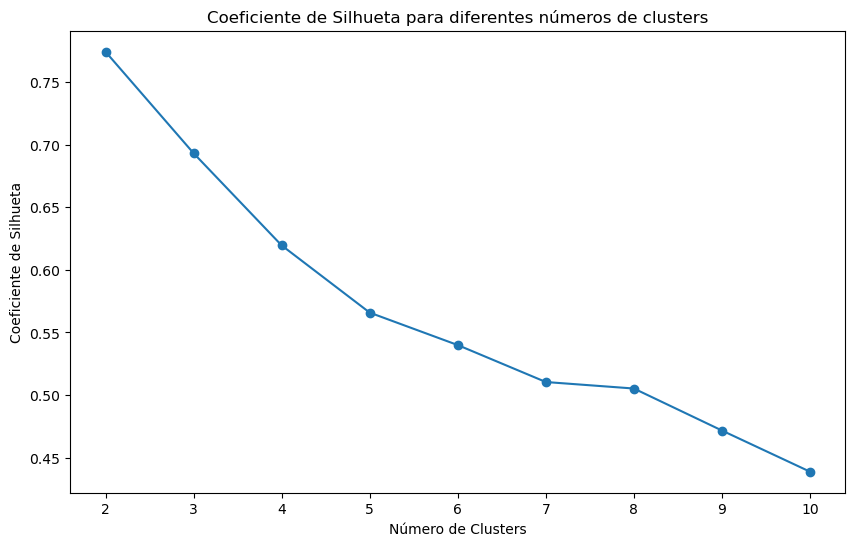

In [16]:
# Plotando o coeficiente de silhueta para cada número de clusters
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.title('Coeficiente de Silhueta para diferentes números de clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silhueta')
plt.show()

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [17]:
# Aplicando K-means com 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42)
df['Cluster_2'] = kmeans_2.fit_predict(dados_clustering)

E:\Users\Matheus Cerqueira\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
# Aplicando K-means com 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
df['Cluster_3'] = kmeans_3.fit_predict(dados_clustering)

E:\Users\Matheus Cerqueira\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
# Calculando as estatísticas descritivas para os clusters com 2 grupos
estatisticas_2_clusters = df.groupby('Cluster_2')[['Administrative', 'Administrative_Duration_log', 'Informational', 'Informational_Duration_log', 'ProductRelated', 'ProductRelated_Duration_log']].describe()

In [22]:
# Calculando as estatísticas descritivas para os clusters com 3 grupos
estatisticas_3_clusters = df.groupby('Cluster_3')[['Administrative', 'Administrative_Duration_log', 'Informational', 'Informational_Duration_log', 'ProductRelated', 'ProductRelated_Duration_log']].describe()

In [23]:
print("Estatísticas dos Clusters com 2 Grupos:")
print(estatisticas_2_clusters)

Estatísticas dos Clusters com 2 Grupos:
          Administrative                                                \
                   count      mean       std  min  25%  50%  75%   max   
Cluster_2                                                                
0                11343.0  1.999030  2.932362  0.0  0.0  1.0  3.0  24.0   
1                  987.0  5.948328  4.969722  0.0  2.0  5.0  9.0  27.0   

          Administrative_Duration_log            ... ProductRelated         \
                                count      mean  ...            75%    max   
Cluster_2                                        ...                         
0                             11343.0  2.149326  ...           31.0   84.0   
1                               987.0  4.114746  ...          162.0  705.0   

          ProductRelated_Duration_log                                          \
                                count      mean       std       min       25%   
Cluster_2                           

In [26]:
print("\nEstatísticas dos Clusters com 3 Grupos:")
print(estatisticas_3_clusters)


Estatísticas dos Clusters com 3 Grupos:
          Administrative                                                 \
                   count      mean       std  min  25%  50%   75%   max   
Cluster_3                                                                 
0                 1885.0  4.710345  4.363636  0.0  1.0  4.0   7.0  24.0   
1                10246.0  1.762639  2.670752  0.0  0.0  0.0   3.0  24.0   
2                  199.0  8.075377  5.749778  0.0  4.0  7.0  11.0  27.0   

          Administrative_Duration_log            ... ProductRelated         \
                                count      mean  ...            75%    max   
Cluster_3                                        ...                         
0                              1885.0  3.699616  ...          105.0  177.0   
1                             10246.0  2.003337  ...           26.0   52.0   
2                               199.0  4.729142  ...          310.0  705.0   

          ProductRelated_Duration_log  

a segmentação em 3 clusters oferece uma visão mais detalhada dos diferentes perfis de usuários.

-> Cluster 0: "Navegadores Moderados"
Usuários com um nível moderado de interação com todas as categorias de páginas.

->Cluster 1: "Navegadores Rápidos"
Usuários que navegam rapidamente, com interações baixas a moderadas em todas as categorias de páginas.

->Cluster 2  "Navegadores Intensos"
Usuários com um alto nível de interação em todas as categorias, especialmente em páginas de produtos.

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [25]:
# Calculando a média de bounce rate e a proporção de revenue para os clusters com 3 grupos
avaliacao_clusters = df.groupby('Cluster_3')[['BounceRates', 'Revenue']].agg({
    'BounceRates': 'mean',
    'Revenue': 'mean'
}).rename(columns={'Revenue': 'Proporcao_Compra'})

avaliacao_clusters

,BounceRates,Proporcao_Compra
Cluster_3,,
0,0.006529,0.246154
1,0.025402,0.134296
2,0.005236,0.341709


Cluster 2 (Navegadores Intensos)
Possui o menor bounce rate (0.005236) e a maior proporção de compra (34.2%). Esse grupo é o mais engajado e tem a maior propensão a realizar uma compra.